In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# q1
n_sims = 100_000
x = np.random.uniform(0, 3, n_sims)
y = np.random.uniform(0, 3, n_sims)
z = np.random.uniform(0, 3, n_sims)

f = np.exp(np.sin(x * y + y * z * z)) / 9

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.158

Mean: 0.1580076020341298
Std Err. 0.0002893024019009752


In [5]:

x = np.random.normal(size=n_sims)
y = np.random.normal(size=n_sims)
z = np.random.normal(size=n_sims)

prop = np.abs(x / y)**2 > z**2

est = np.mean(prop)
std_err = np.sqrt(est * (1 - est) / n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.628

Mean: 0.62849
Std Err. 0.001528039004410555


In [ ]:
# q3

# 8.0

In [9]:
# q4

num_rolls_to_exceed = np.zeros(n_sims)

for i in range(n_sims):
    num_rolls = 0
    total = 0 
    while total <= 20:
        roll = np.random.randint(low=1, high=7)
        total += roll
        num_rolls += 1
    
    num_rolls_to_exceed[i] = num_rolls

est = np.mean(num_rolls_to_exceed)
std_err = np.std(num_rolls_to_exceed) / np.sqrt(n_sims)


print(f"Mean: {est}\nStd Err. {std_err}")

# 6.486..

Mean: 6.48603
Std Err. 0.003941731648780773


In [125]:
x = np.random.uniform(0, 3, n_sims)
y = np.random.uniform(0, 3, n_sims)

# normalizing constant estimate
z = np.mean(np.log(y**2 + 1) * 3 )

f = x * np.log(x**2 + 1) / z * 3

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 2.050...

Mean: 2.0622909250338877
Std Err. 0.0059207671505018865


In [ ]:
# It is possible to compute the integral using other numerical methods
# Note: This can be a useful tool to check answers during the Midterm
from scipy.integrate import quad

f = lambda x: x * np.log(x**2 + 1) / z

quad(f, 0, 3)

(2.0530142827286806, 3.1438318551939707e-10)

In [11]:
# rejection sampling to sample from this distribution

x = np.random.uniform(0, 3, n_sims)
u = np.random.uniform(0, np.log(10), n_sims)

acc_mask = u <= np.log(1 + x**2)

acc_samples = x[acc_mask]

est = np.mean(acc_samples)
std = np.std(acc_samples) / np.sqrt(len(acc_samples))

print(f"Mean: {est}\nStd Err. {std_err}")

# 2.060

Mean: 2.0603648931921636
Std Err. 0.005908924470482236


In [16]:
# q7

y = np.random.uniform(0, 1, n_sims)
x = (16 * y)**(0.25) * (16 * (1 - y))**(0.25)

est = np.mean(x)
std_err = np.std(x) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 2.471


Mean: 2.471658727293283
Std Err. 0.0013124092433462803


Mean: 0.34638
Std Err. 0.0015046624059901277


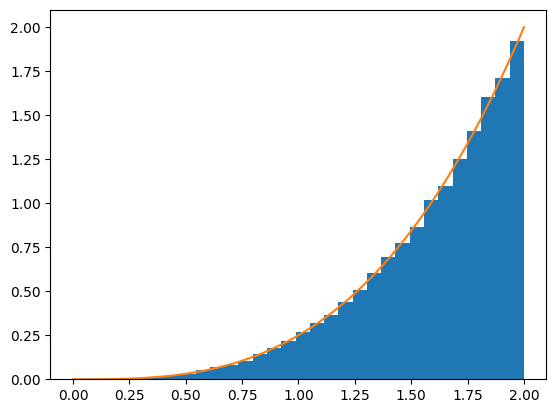

In [23]:
# q8

x = (16 * y)**(0.25)
prop = x > 1.8

est = np.mean(prop)
std_err = np.sqrt(est * (1 - est) / n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.3468

xx = np.linspace(0, 2, 100)
yy = xx**3 / 4

plt.hist(x, bins=30, density=True)
plt.plot(xx, yy)

In [25]:
x = np.random.normal(0, 1, n_sims)
f = np.log(1 + x**2) * np.sqrt(2 * np.pi)

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 1.335

Mean: 1.3357602548075138
Std Err. 0.004112222266448858


In [27]:
n_sims = 1_000_000

x = np.random.standard_cauchy(n_sims)
y = np.random.standard_cauchy(n_sims)

f = np.pi**2 * np.sin(3 * x**2 + 2*y**2)

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 1.0887

Mean: 1.088755967549517
Std Err. 0.006850389648163159


In [115]:
# q11
from scipy.stats import expon

# importance sampling
mu = 4
exps = np.random.exponential(scale=mu, size=(n_sims, 10))
exps_max = np.max(exps, axis=1)

weights = expon.pdf(exps, scale=1) / expon.pdf(exps, scale=mu)
importance_ratio = np.prod(weights, axis=1)

prop = (exps_max > 4) * importance_ratio

est = np.mean(prop)
std_err = np.sqrt(est * (1 - est) / n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.16336


Mean: 0.18013476320117633
Std Err. 0.0012152622362586294


In [114]:
# without importance sampling

n_sims = 100_000

exps = np.random.exponential(size=(n_sims, 10))
exps_max = np.max(exps, axis=1)

prop = (exps_max > 4)

est = np.mean(prop)
std_err = np.sqrt(est * (1 - est) / n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.16845

Mean: 0.16897
Std Err. 0.001184985818902488


In [ ]:
# q12 (conceptual question)

# 0.0

In [30]:
# q13

x = np.random.normal(0, 1, n_sims)
y = np.random.normal(0, 1, n_sims)

acc_mask = x + y > 1

x_acc = x[acc_mask]
y_acc = y[acc_mask]

f = x_acc * y_acc

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.4604

Mean: 0.46047397881098673
Std Err. 0.0010638106844299007


In [65]:
from scipy.stats import norm

# q14
n_sims = 100_000

x = np.random.normal(loc=0, scale=5, size=n_sims)
y = np.random.normal(loc=0, scale=5, size=n_sims)

importance_ratio = norm.pdf(x, loc=0, scale=1) / norm.pdf(x, loc=0, scale=5) \
    * norm.pdf(y, loc=0, scale=1) / norm.pdf(y, loc=0, scale=5)

prop = (x**2 + y**2 > 40) * importance_ratio

alpha = 10**10 * np.mean(prop)

print(alpha)

# 20.102


20.102749378120826


In [68]:
u = np.random.uniform(-0.5, 0.5, size=(n_sims, 12))
u_sums = np.sum(u, axis=1)

prop = u_sums > 0.5

est = np.mean(prop)
std_err = np.sqrt(est * (1 - est) / np.sqrt(n_sims))

print(f"Mean: {est}\nStd Err. {std_err}")

print(f"1 - CDF(0.5): {1 - norm.cdf(0.5)}")

# 0.30996

Mean: 0.31347
Std Err. 0.026087217064371507
1 - CDF(0.5): 0.3085375387259869


In [ ]:
# q16 (Conceptual question)

# 0.0

In [69]:
# q17

x = np.random.uniform(-2, 2, n_sims)
y = np.random.uniform(-2, 2, n_sims)
z = np.random.uniform(-2, 2, n_sims)

u = np.random.uniform(0, 12, n_sims)

acc_mask = u < x**2 + y**2 + z**2

x_acc = x[acc_mask]
y_acc = y[acc_mask]
z_acc = z[acc_mask]

f = x_acc**2 + y_acc**2 + z_acc**2

est = np.mean(f)
std_err = np.std(f) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 5.077

Mean: 5.077889031071774
Std Err. 0.006270743287737282


In [79]:
n_sims = 100_000
Z = 2 * (np.random.randint(low=0, high=2, size=(n_sims, 50)) - 0.5)
X = np.cumsum(Z, axis=1)

L = np.sum(X == 0.0, axis=1)

est = np.mean(L)
std_err = np.std(L) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

Mean: 4.72955
Std Err. 0.01159566591339195


Std Dev. 3.6668715272695334


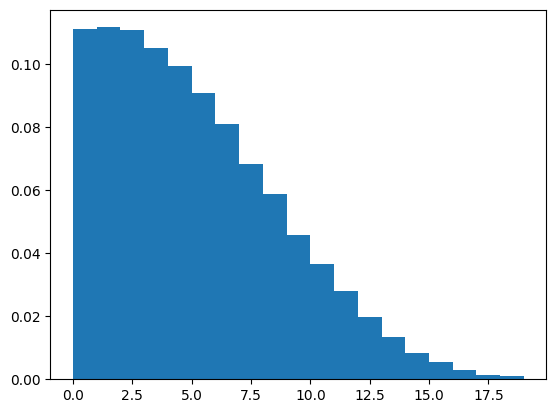

In [89]:
# q19

std = np.std(L)

print(f"Std Dev. {std}")

plt.hist(L, bins=np.arange(0, 20), density=True)
plt.show()

In [110]:
# q20
n_sims = 100_000
k = 5

points = np.random.uniform(0, 2 * np.pi, size=(n_sims, k))
points = np.sort(points, axis=1)

dists = points - np.roll(points, shift=1, axis=1)
negs = (dists <= 0)
dists[negs] += np.pi * 2

in_diam = np.any(dists > np.pi, axis=1)

est = np.mean(in_diam)
std_err = np.std(in_diam) / np.sqrt(n_sims)

print(f"Mean: {est}\nStd Err. {std_err}")

# 0.31215


Mean: 0.31215
Std Err. 0.0014653067170391325
